In [69]:
import numpy as np
import pandas as pd
import os
import math
import csv
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from cv2 import imread, IMREAD_GRAYSCALE
from tensorflow.keras import losses
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, Input, Dropout, LSTM, Dense, BatchNormalization, Activation, Reshape
from tensorflow.keras.layers import DepthwiseConv2D, SeparableConv2D, AveragePooling2D, Bidirectional, concatenate, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

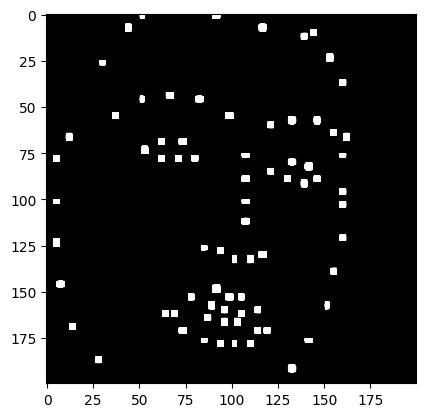

In [75]:
rich_face_input_dir = './Final_Project_ML-main/richFaces_asia_focus_extract_green'
n_face_input_dir = './Final_Project_ML-main/poorFaces_asia_focus_extract_green'
rich_n = 0
normal_n = 0
rich_list = []
norm_list = []
n_list = []

for filename in os.listdir(rich_face_input_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image = imread(rich_face_input_dir + '/' + filename, IMREAD_GRAYSCALE)
        image = cv2.resize(image, (200, 200), interpolation=cv2.INTER_AREA)
        rich_list.append(image)
        rich_n += 1

for filename in os.listdir(n_face_input_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image = imread(n_face_input_dir + '/' + filename, IMREAD_GRAYSCALE)
        image = cv2.resize(image, (200, 200), interpolation=cv2.INTER_AREA)
        norm_list.append(image)
        normal_n += 1
        if normal_n >= rich_n:
            break

rich_list = np.array(rich_list).reshape((len(rich_list), 200, 200, 1))
norm_list = np.array(norm_list).reshape((len(norm_list), 200, 200, 1))
plt.imshow(rich_list[0].squeeze(), cmap='gray', vmin=0, vmax=1)
plt.show()

In [81]:
print(normal_n, rich_n, len(rich_list), len(norm_list))
# label_n = np.ones(len(img_list))
# label_n[:rich_n] = 0
# label_n = label_n.reshape((len(img_list), 1))
# print(img_list.shape, label_n.shape)

rich_train_data, rich_val_data, norm_train_data, norm_val_data = train_test_split(rich_list, norm_list, test_size=0.2, random_state=42)
train_data = np.concatenate([rich_train_data, norm_train_data])
val_data = np.concatenate([rich_val_data, norm_val_data])
print(train_data.shape, val_data.shape)
train_labels = np.ones(train_data.shape[0])
train_labels[:rich_train_data.shape[0]] = 0
train_labels = train_labels.reshape((train_data.shape[0], 1))

val_labels = np.ones(val_data.shape[0])
val_labels[:rich_val_data.shape[0]] = 0
val_labels = val_labels.reshape((val_data.shape[0], 1))
train_data = tf.convert_to_tensor(train_data, dtype=np.float64)
val_data = tf.convert_to_tensor(val_data, dtype=np.float64)
train_labels = tf.convert_to_tensor(train_labels, dtype=np.float64)
val_labels = tf.convert_to_tensor(val_labels, dtype=np.float64)
print(train_data.shape, val_data.shape, train_labels.shape, val_labels.shape)

220 220 220 220
(352, 200, 200, 1) (88, 200, 200, 1)
(352, 200, 200, 1) (88, 200, 200, 1) (352, 1) (88, 1)


In [85]:
cnn_v1 = Sequential()
cnn_v1.add(Conv2D(32, (3, 3), activation='relu'))
cnn_v1.add(Conv2D(64, (5, 5), activation='relu'))
cnn_v1.add(MaxPooling2D((3, 3)))
cnn_v1.add(Dropout(0.25))
cnn_v1.add(Conv2D(64, (3, 3), activation='relu'))
cnn_v1.add(MaxPooling2D((3, 3)))
cnn_v1.add(Dropout(0.25))
cnn_v1.add(Reshape((1, -1)))
cnn_v1.add(Dense(32, activation='relu'))
cnn_v1.add(Dropout(0.2))
cnn_v1.add(Dense(1, activation='sigmoid'))
cnn_v1.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [74]:
history = cnn_v1.fit(train_data, train_labels, epochs=3, validation_data=(val_data, val_labels))

Epoch 1/3
 37/103 [=========>....................] - ETA: 4:57 - loss: 0.7636 - accuracy: 0.9459

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()